## Bamboo Weekly 13 | Python Developers

In honor of PyCon US 2023, we'll look at some data from the most recent Python developers survey. What other programming languages do they use? What education did they get?

### Imports

In [6]:
import pandas as pd
# import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from urllib.request import urlretrieve

# from google.colab import auth
pd.set_option("display.max_columns", None)
print("Setup Complete")

Setup Complete


In [7]:
# # If you are using google colab you can use this to dowload the files
# # Source: https://sigmundojr.medium.com/how-do-i-read-a-csv-file-from-google-drive-using-python-colab-966091922852
# # Authenticate Gdrive
# auth.authenticate_user()
# g_auth = GoogleAuth()
# g_auth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(g_auth)
# # Get file_id
# file_id = drive.CreateFile({"id": "1PaPYAH9dntwbACjp00e3dmxmgnYo1KBf"})
# csv_file = file_id.GetContentFile("DevEcosystem_2022_sharing_data.csv")


### Read Data

In [8]:
# Read data
file_path = "~/Downloads/DevEcosystem_2022_sharing_data.csv"
df = pd.read_csv(file_path)

df.head()


/var/folders/h2/6110hgtx6b7400ybw7yjhn400000gn/T/ipykernel_37456/1660723853.py:3: DtypeWarning: Columns (11,12,13,16,19,21,26,27,37,46,47,52,55,57,58,59,79,80,89,91,93,96,99,105,107,109,113,114,117,118,119,120,126,127,130,133,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,162,163,171,172,177,179,180,181,185,189,193,194,196,201,206,208,212,214,215,216,218,219,220,224,226,227,228,229,231,233,234,235,236,239,241,242,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,269,270,271,272,273,274,275,276,277,278,279,280,281,282,285,286,287,288,289,290,291,292,293,294,297,298,299,300,303,304,305,306,307,308,313,314,315,316,319,320,321,322,323,324,325,326,329,330,331,332,333,335,336,337,338,339,341,342,343,344,345,346,347,349,350,351,352,357,358,359,360,361,362,363,364,365,367,368,370,371,372,373,374,376,377,378,383,385,387,388,389,390,391,393,395,396,397,398,399,400,401,402,403,404,408,410,411,412,413,414,415,417,41

,response_id,weight,terms.I have read and I accept these Terms and Conditions,amazon,employment_status,job_role.Developer / Programmer / Software Engineer,job_role.DevOps Engineer / Infrastructure Developer,job_role.DBA,job_role.Architect,job_role.Tester / QA Engineer,job_role.Technical Support,job_role.Data Analyst / Data Engineer/ Data Scientist,job_role.Business Analyst,job_role.Technical Writer,job_role.Team Lead,job_role.Systems Analyst,job_role.Product Manager / Marketing Manager,job_role.UX / UI Designer,job_role.CIO / CEO / CTO,job_role.Developer Advocate,job_role.Instructor / Teacher / Tutor,job_role.Other,position_level,os_devenv.Windows,os_devenv.Linux,os_devenv.macOS,os_devenv.Other,activities_kinds.None,activities_kinds.Academic Research,activities_kinds.Coding / Programming,activities_kinds.Code Reviewing,activities_kinds.Testing,activities_kinds.System Design,activities_kinds.Graphics Design / Art,activities_kinds.Infrastructure Development / DevOps,activities_kinds.System Administration,activities_kinds.Deployment,activities_kinds.Business Intelligence,activities_kinds.Data Analysis,activities_kinds.Data Engineering,activities_kinds.Machine Learning,activities_kinds.Teaching Programming,activities_kinds.People Management,activities_kinds.Product Management,activities_kinds.Technical Writing,activities_kinds.UX/UI Design/Research,activities_kinds.Other,target_platforms.I don't develop anything,target_platforms.Desktop,target_platforms.Mobile,target_platforms.Web (Back-end),target_platforms.Web (Front-end),target_platforms.Consoles (Xbox / PlayStation / Nintendo etc_),target_platforms.Server / Infrastructure,target_platforms.IoT / Embedded,target_platforms.WebAssembly,target_platforms.Cloud,target_platforms.Other,sw_types_developed.I don’t develop anything,sw_types_developed.Augmented Reality / Virtual Reality,sw_types_developed.Business Intelligence / Data Science / Machine Learning,sw_types_developed.Blockchain,sw_types_developed.Database / Data Storage,sw_types_developed.Entertainment,sw_types_developed.Finance,sw_types_developed.Games,sw_types_developed.Hardware,sw_types_developed.Home Automation,sw_types_developed.IT Infrastructure,sw_types_developed.Libraries / Frameworks,sw_types_developed.Programming Tools,sw_types_developed.Security,sw_types_developed.System Software,sw_types_developed.Utilities (small apps for small tasks),sw_types_developed.Websites,sw_types_developed.Other,target_os.Windows,target_os.Linux,target_os.macOS,target_os.Other,teaching_what,code_yrs,edu_level,age_range,country,gender,dev_devices.Desktop,dev_devices.Laptop,dev_devices.Tablet,dev_devices.Chromebook or similar device,dev_devices.Smartphone,dev_devices.Other,know_jb,jb_prod_use.None,jb_prod_use.IntelliJ IDEA Ultimate,jb_prod_use.IntelliJ IDEA Community Edition,jb_prod_use.RubyMine,jb_prod_use.PyCharm Professional Edition,jb_prod_use.PyCharm Community Edition,jb_prod_use.AppCode,jb_prod_use.CLion,jb_prod_use.PhpStorm,jb_prod_use.WebStorm,jb_prod_use.GoLand,jb_prod_use.DataGrip,jb_prod_use.DataSpell,jb_prod_use.JetBrains Rider,jb_prod_use.Fleet,jb_prod_use.ReSharper,jb_prod_use.ReSharper C++,jb_prod_use.dotCover,jb_prod_use.dotTrace,jb_prod_use.dotMemory,jb_prod_use.dotPeek,jb_prod_use.Space,jb_prod_use.TeamCity,jb_prod_use.YouTrack,jb_prod_use.Datalore,jb_prod_use.Upsource,jb_prod_use.Qodana,jb_prod_use.PyCharm Edu,jb_prod_use.IntelliJ IDEA Edu,jb_prod_use.JetBrains Academy,jb_prod_use.JetBrains Toolbox,jb_prod_use.Code With Me,jb_prod_use.JetBrains Gateway,jb_prod_use.MPS,jb_prod_exp.None,jb_prod_exp.IntelliJ IDEA,jb_prod_exp.IntelliJ IDEA Community Edition,jb_prod_exp.RubyMine,jb_prod_exp.PyCharm,jb_prod_exp.PyCharm Community Edition,jb_prod_exp.AppCode,jb_prod_exp.CLion,jb_prod_exp.PhpStorm,jb_prod_exp.WebStorm,jb_prod_exp.GoLand,jb_prod_exp.DataGrip,jb_prod_exp.DataSpell,jb_prod_exp.Rider,jb_prod_exp.Fleet,jb_prod_exp.ReSharper,jb_prod_exp.ReSharper C++,jb_prod_exp.dotCover,jb_prod_exp.dotTrace,jb_prod_exp.dotMemory,jb_prod_

In [9]:
# EDA before tweak
df.shape[0]


29269

In [13]:
# Define a function to filter columns

def tweak_df(df: pd.DataFrame, target_cols: list) -> pd.DataFrame:
    cols_to_include = ["response_id", "weight", "amazon", "employment_status"]
    for target_col in target_cols:
        for col in df.columns:
            if target_col in col:
                cols_to_include.append(col)
    return df[cols_to_include]


cols = ["job_role", "edu_level", "primary_proglang"]
df_devs_2022 = tweak_df(df, target_cols=cols)
df_devs_2022.head()

,response_id,weight,amazon,employment_status,job_role.Developer / Programmer / Software Engineer,job_role.DevOps Engineer / Infrastructure Developer,job_role.DBA,job_role.Architect,job_role.Tester / QA Engineer,job_role.Technical Support,job_role.Data Analyst / Data Engineer/ Data Scientist,job_role.Business Analyst,job_role.Technical Writer,job_role.Team Lead,job_role.Systems Analyst,job_role.Product Manager / Marketing Manager,job_role.UX / UI Designer,job_role.CIO / CEO / CTO,job_role.Developer Advocate,job_role.Instructor / Teacher / Tutor,job_role.Other,edu_level,primary_proglang.Assembly,primary_proglang.C,primary_proglang.C#,primary_proglang.C++,primary_proglang.Clojure / ClojureScript,primary_proglang.Dart,primary_proglang.Delphi,primary_proglang.Elixir,primary_proglang.F#,primary_proglang.Go,primary_proglang.GraphQL,primary_proglang.Groovy,primary_proglang.Haskell,primary_proglang.HTML / CSS,primary_proglang.Java,primary_proglang.JavaScript,primary_proglang.Julia,primary_proglang.Kotlin,primary_proglang.Lua,primary_proglang.MATLAB,primary_proglang.Objective-C,primary_proglang.Perl,primary_proglang.PHP,"primary_proglang.Platform tied language(Apex, ABAP, 1C)",primary_proglang.Python,primary_proglang.R,primary_proglang.Ruby,primary_proglang.Rust,primary_proglang.Scala,primary_proglang.Shell scripting languages,primary_proglang.SQL,primary_proglang.Swift,primary_proglang.TypeScript,primary_proglang.Visual Basic,primary_proglang.Other
0,qQ5x,1.970867,France,Partially employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jnvX,0.318537,United States,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Master’s degree (MA, MS, M_Eng_, MBA, etc_)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,Shell scripting languages,NaN,NaN,TypeScript,NaN,NaN
2,VVpl,3.875585,NaN,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,Go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TypeScript,NaN,NaN
3,D94r,0.460676,Germany,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,DBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,NaN,TypeScript,NaN,NaN
4,y3zW,1.172686,NaN,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,Architect,NaN,NaN,NaN,NaN,NaN,Team Lead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TypeScript,NaN,NaN


### Q3 - How many people took the survey?


In [ ]:
# Q3 - How many people took the survey?
num_unique = df_devs_2022.response_id.nunique()
num_rows = df_devs_2022.shape[0]
print(f"The number of rows in the dataframe is: {num_rows}")
print(f"The number of pers who took the survey is: {num_unique}")

The number of rows in the dataframe is: 29269
The number of pers who took the survey is: 29269


### Q4- How many people who took the survey have each kind of educational level? What percentage have a master's, doctoral degree, or professional degree?

In [ ]:
# Q4- How many people who took the survey have each kind of educational level?
# What percentage have a master's, doctoral degree, or professional degree?

df_educ_level = (
    df_devs_2022["edu_level"]
    .value_counts()
    .reset_index(drop=False)
    .assign(perc=lambda df: df["edu_level"] / df["edu_level"].sum() * 100)
    .rename(columns={"index": "edu_level", "edu_level": "num"})
)

df_educ_level

,edu_level,num,perc
0,"Bachelor’s degree (BA, BS, B_Eng_, etc_)",7523,44.715882
1,Some college/university study without earning ...,3314,19.698050
2,"Master’s degree (MA, MS, M_Eng_, MBA, etc_)",3308,19.662387
3,"Secondary school (e_g_ American high school, G...",1619,9.623157
4,"Professional degree (JD, MD, etc_)",352,2.092249
5,"Doctoral degree (Ph_D, Ed_D_, etc_)",283,1.682121
6,Other,224,1.331431
7,Primary/elementary school,105,0.624108
8,I never completed any formal education,96,0.570613


### Q5 - Turn the single `edu_level` column into many different columns, each indicating with a `True`/`False` value whether this person has that educational level. For example, there should be one column indicating whether they got a bachelor's degree, a second for master's degrees, a third for doctoral degrees, and so forth. Add these new columns to the data frame.

In [70]:
# Q5 -Turn the single `edu_level` column into many different columns, each indicating with a `True`/`False` value 
# whether this person has that educational level. For example, there should be one column indicating whether 
# they got a bachelor's degree, a second for master's degrees, a third for doctoral degrees, and so forth. 
# Add these new columns to the data frame.

df_ = (pd.get_dummies(df_devs_2022, columns=["edu_level"], dummy_na=True)
       .replace({1: True, 0: False})
    )

df_.head()

,response_id,weight,amazon,employment_status,job_role.Developer / Programmer / Software Engineer,job_role.DevOps Engineer / Infrastructure Developer,job_role.DBA,job_role.Architect,job_role.Tester / QA Engineer,job_role.Technical Support,job_role.Data Analyst / Data Engineer/ Data Scientist,job_role.Business Analyst,job_role.Technical Writer,job_role.Team Lead,job_role.Systems Analyst,job_role.Product Manager / Marketing Manager,job_role.UX / UI Designer,job_role.CIO / CEO / CTO,job_role.Developer Advocate,job_role.Instructor / Teacher / Tutor,job_role.Other,primary_proglang.Assembly,primary_proglang.C,primary_proglang.C#,primary_proglang.C++,primary_proglang.Clojure / ClojureScript,primary_proglang.Dart,primary_proglang.Delphi,primary_proglang.Elixir,primary_proglang.F#,primary_proglang.Go,primary_proglang.GraphQL,primary_proglang.Groovy,primary_proglang.Haskell,primary_proglang.HTML / CSS,primary_proglang.Java,primary_proglang.JavaScript,primary_proglang.Julia,primary_proglang.Kotlin,primary_proglang.Lua,primary_proglang.MATLAB,primary_proglang.Objective-C,primary_proglang.Perl,primary_proglang.PHP,"primary_proglang.Platform tied language(Apex, ABAP, 1C)",primary_proglang.Python,primary_proglang.R,primary_proglang.Ruby,primary_proglang.Rust,primary_proglang.Scala,primary_proglang.Shell scripting languages,primary_proglang.SQL,primary_proglang.Swift,primary_proglang.TypeScript,primary_proglang.Visual Basic,primary_proglang.Other,"edu_level_Bachelor’s degree (BA, BS, B_Eng_, etc_)","edu_level_Doctoral degree (Ph_D, Ed_D_, etc_)",edu_level_I never completed any formal education,"edu_level_Master’s degree (MA, MS, M_Eng_, MBA, etc_)",edu_level_Other,edu_level_Primary/elementary school,"edu_level_Professional degree (JD, MD, etc_)","edu_level_Secondary school (e_g_ American high school, German Realschule or Gymnasium, etc_)",edu_level_Some college/university study without earning a bachelor’s degree,edu_level_nan
0,qQ5x,1.970867,France,Partially employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True
1,jnvX,0.318537,United States,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,Shell scripting languages,NaN,NaN,TypeScript,NaN,NaN,False,False,False,True,False,False,False,False,False,False
2,VVpl,3.875585,NaN,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,Go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TypeScript,NaN,NaN,False,False,False,False,False,False,False,False,False,True
3,D94r,0.460676,Germany,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,DBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SQL,NaN,TypeScript,NaN,NaN,False,False,False,False,False,False,False,False,False,True
4,y3zW,1.172686,NaN,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,Architect,NaN,NaN,NaN,NaN,NaN,Team Lead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TypeScript,NaN,NaN,False,False,False,False,False,False,False,False,False,True


### Q7- What are the 10 most common primary programming languages used by people who took the survey? Are the results surprising?

In [ ]:
# Q7- What are the 10 most common primary programming languages used by people who took the survey? Are the results surprising?
# df_devs_2022.columns.str.contains("primary_proglang")

df_proglang = (
    df_devs_2022.loc[:, df_devs_2022.columns.str.contains("primary_proglang")]
    .stack()
    .value_counts(ascending=False)
    .to_frame()
    .reset_index()
    .rename(columns={"index": "prog_lang", 0: "num_users"})
    .assign(perc=lambda df: df["num_users"] / df["num_users"].sum() * 100)
)

df_proglang

,prog_lang,num_users,perc
0,JavaScript,9515,13.830143
1,Java,8713,12.664428
2,Python,8315,12.085931
3,HTML / CSS,5726,8.322795
4,TypeScript,5663,8.231224
5,SQL,5605,8.146921
6,C#,4432,6.441954
7,PHP,4036,5.866364
8,Kotlin,2933,4.263143
9,C++,2752,4.000058


### Q7- Horizontal Bar plot (Proglang vs Number of Users)

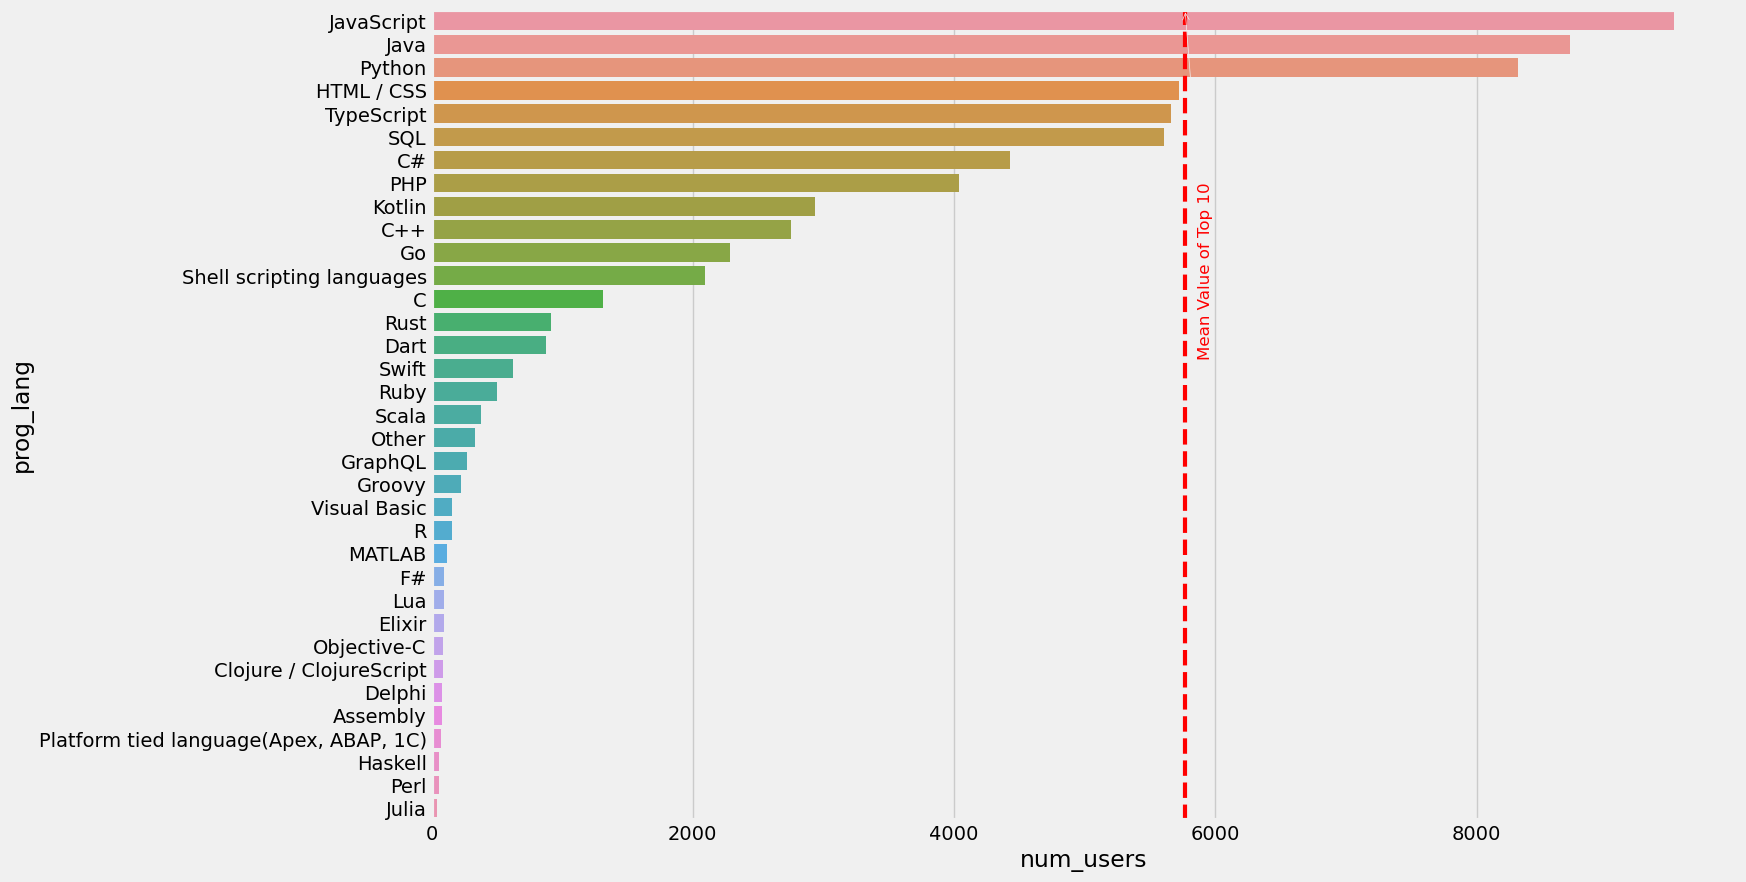

In [ ]:
# Vizualize the programming languages 
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))

# Create a horizontal bar plot
ax = sns.barplot(data=df_proglang, y="prog_lang", x="num_users")

# Mean value of top 10 programming language
mean_value_top_10 = df_proglang["num_users"].nlargest(n=10).mean()
ax.axvline(x=mean_value_top_10, color="red", ls="--", lw=3.0)

# Add a label for the vertical line
ax.annotate('Mean Value of Top 10', xy=(mean_value_top_10, ax.get_ylim()[1]), xytext=(mean_value_top_10 + 100, ax.get_ylim()[1] + 15),
            color='red', fontsize=12, fontweight='regular', rotation=90,
            arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.show()


### Q8- How many people have more than one job role? How many have more than 5?


In [71]:
df_.head(n=2)

,response_id,weight,amazon,employment_status,job_role.Developer / Programmer / Software Engineer,job_role.DevOps Engineer / Infrastructure Developer,job_role.DBA,job_role.Architect,job_role.Tester / QA Engineer,job_role.Technical Support,job_role.Data Analyst / Data Engineer/ Data Scientist,job_role.Business Analyst,job_role.Technical Writer,job_role.Team Lead,job_role.Systems Analyst,job_role.Product Manager / Marketing Manager,job_role.UX / UI Designer,job_role.CIO / CEO / CTO,job_role.Developer Advocate,job_role.Instructor / Teacher / Tutor,job_role.Other,primary_proglang.Assembly,primary_proglang.C,primary_proglang.C#,primary_proglang.C++,primary_proglang.Clojure / ClojureScript,primary_proglang.Dart,primary_proglang.Delphi,primary_proglang.Elixir,primary_proglang.F#,primary_proglang.Go,primary_proglang.GraphQL,primary_proglang.Groovy,primary_proglang.Haskell,primary_proglang.HTML / CSS,primary_proglang.Java,primary_proglang.JavaScript,primary_proglang.Julia,primary_proglang.Kotlin,primary_proglang.Lua,primary_proglang.MATLAB,primary_proglang.Objective-C,primary_proglang.Perl,primary_proglang.PHP,"primary_proglang.Platform tied language(Apex, ABAP, 1C)",primary_proglang.Python,primary_proglang.R,primary_proglang.Ruby,primary_proglang.Rust,primary_proglang.Scala,primary_proglang.Shell scripting languages,primary_proglang.SQL,primary_proglang.Swift,primary_proglang.TypeScript,primary_proglang.Visual Basic,primary_proglang.Other,"edu_level_Bachelor’s degree (BA, BS, B_Eng_, etc_)","edu_level_Doctoral degree (Ph_D, Ed_D_, etc_)",edu_level_I never completed any formal education,"edu_level_Master’s degree (MA, MS, M_Eng_, MBA, etc_)",edu_level_Other,edu_level_Primary/elementary school,"edu_level_Professional degree (JD, MD, etc_)","edu_level_Secondary school (e_g_ American high school, German Realschule or Gymnasium, etc_)",edu_level_Some college/university study without earning a bachelor’s degree,edu_level_nan
0,qQ5x,1.970867,France,Partially employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True
1,jnvX,0.318537,United States,Fully employed by a company / organization,Developer / Programmer / Software Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,Shell scripting languages,NaN,NaN,TypeScript,NaN,NaN,False,False,False,True,False,False,False,False,False,False


In [97]:
# Q8- How many people have more than one job role? How many have more than 5?

# Filter only job role columns
df_jobrole = df_devs_2022.set_index(["response_id", "amazon", "employment_status"]).filter(like="job_role")

# Convert categories to numerical values
df_jobrole_ = pd.get_dummies(data=df_jobrole)

# Add column to add job role
df_jobrole_ = df_jobrole_.assign(jobrole_count= df_jobrole_.sum(axis=1))

# Number of people with more than 1 job role
df_jobrole_gte1 = df_jobrole_.loc[df_jobrole_["jobrole_count"] > 1]["jobrole_count"].count()
perc_jobrole = df_jobrole_gte1 / df_devs_2022.shape[0]
print(f"The number of people with more than 1 job roles is: {df_jobrole_gte1} | {perc_jobrole:.2%}")

# Number of people with more than 5 job role
df_jobrole_gte5 = df_jobrole_.loc[df_jobrole_["jobrole_count"] > 5]["jobrole_count"].count()
perc_jobrole = df_jobrole_gte5 / df_devs_2022.shape[0]
print(f"The number of people with more than 5 job roles is: {df_jobrole_gte1} | {perc_jobrole:.2%}")


The number of people with more than 1 job roles is: 8303 | 28.37%
The number of people with more than 5 job roles is: 8303 | 0.99%


In [102]:
# 
df_jobrole
# Number of people with more than 10 job role
df_jobrole_gte10 = df_jobrole_.loc[df_jobrole_["jobrole_count"] > 10]
df_jobrole_gte10

,,,job_role.Developer / Programmer / Software Engineer_Developer / Programmer / Software Engineer,job_role.DevOps Engineer / Infrastructure Developer_DevOps Engineer / Infrastructure Developer,job_role.DBA_DBA,job_role.Architect_Architect,job_role.Tester / QA Engineer_Tester / QA Engineer,job_role.Technical Support_Technical Support,job_role.Data Analyst / Data Engineer/ Data Scientist_Data Analyst / Data Engineer/ Data Scientist,job_role.Business Analyst_Business Analyst,job_role.Technical Writer_Technical Writer,job_role.Team Lead_Team Lead,job_role.Systems Analyst_Systems Analyst,job_role.Product Manager / Marketing Manager_Product Manager / Marketing Manager,job_role.UX / UI Designer_UX / UI Designer,job_role.CIO / CEO / CTO_CIO / CEO / CTO,job_role.Developer Advocate_Developer Advocate,job_role.Instructor / Teacher / Tutor_Instructor / Teacher / Tutor,job_role.Other_Other,jobrole_count
response_id,amazon,employment_status,,,,,,,,,,,,,,,,,,
NgYa,Japan,Freelancer (a person pursuing a profession without a long-term commitment to any one employer),1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,11


#### Q8A - Stats on Job Role

In [ ]:
# Q8A- Stats on Job role
df_jobrole = (
    df_devs_2022.loc[:, df_devs_2022.columns.str.contains("job_role")]
    .stack()
    .value_counts(ascending=False)
    .to_frame()
    .reset_index()
    .rename(columns={"index": "job_role", 0: "count"})
    .assign(perc=lambda df: df["count"] / df["count"].sum() * 100)
)

df_jobrole

,job_role,count,perc
0,Developer / Programmer / Software Engineer,20601,51.649702
1,Team Lead,3576,8.965552
2,Architect,3119,7.819786
3,DevOps Engineer / Infrastructure Developer,2959,7.418643
4,Data Analyst / Data Engineer/ Data Scientist,1407,3.527554
5,CIO / CEO / CTO,1102,2.762874
6,Technical Support,1014,2.542245
7,UX / UI Designer,864,2.166174
8,Tester / QA Engineer,770,1.930502
9,Instructor / Teacher / Tutor,750,1.880359


#### Q8A - Horizontal Bar plot (Jobs Role vs Number of Users)

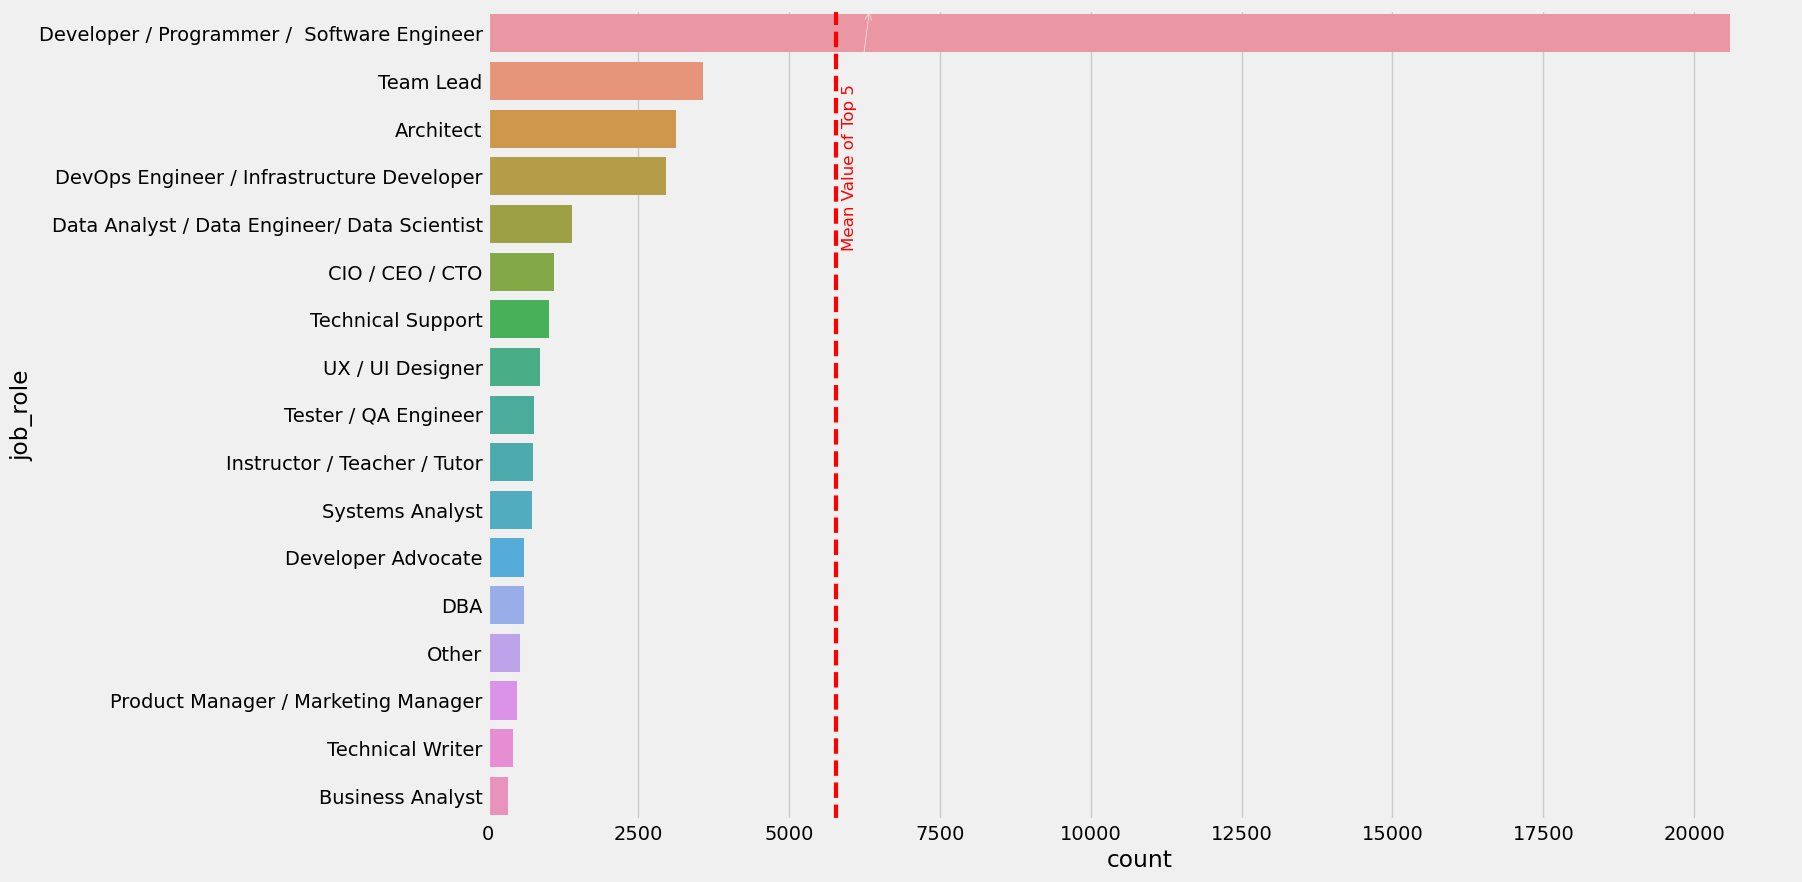

In [ ]:
# Vizualize the job roles
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))

# Create a horizontal bar plot
ax = sns.barplot(data=df_jobrole, y="job_role", x="count")

# Mean value of top 10 programming language
mean_value_top_5 = df_jobrole["count"].nlargest(n=5).mean()
ax.axvline(x=mean_value_top_10, color="red", ls="--", lw=3.0)

# Add a label for the vertical line
ax.annotate('Mean Value of Top 5', xy=(mean_value_top_5, ax.get_ylim()[1]), xytext=(mean_value_top_10 + 100, ax.get_ylim()[1] + 5),
            color='red', fontsize=12, fontweight='regular', rotation=90,
            arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.show()


### Q8B -How many people have more than one job role? Show distribution

In [19]:
# Filter only job role columns
df_jobrole = df_devs_2022.loc[:, df_devs_2022.columns.str.contains("job_role")]

# Convert categories to numerical values
df_jobrole_ = pd.get_dummies(data=df_jobrole)

# Add column to add job role
df_jobrole_ = df_jobrole_.assign(jobrole_count= df_jobrole_.sum(axis=1))
df_jobrole_.head()

,job_role.Developer / Programmer / Software Engineer_Developer / Programmer / Software Engineer,job_role.DevOps Engineer / Infrastructure Developer_DevOps Engineer / Infrastructure Developer,job_role.DBA_DBA,job_role.Architect_Architect,job_role.Tester / QA Engineer_Tester / QA Engineer,job_role.Technical Support_Technical Support,job_role.Data Analyst / Data Engineer/ Data Scientist_Data Analyst / Data Engineer/ Data Scientist,job_role.Business Analyst_Business Analyst,job_role.Technical Writer_Technical Writer,job_role.Team Lead_Team Lead,job_role.Systems Analyst_Systems Analyst,job_role.Product Manager / Marketing Manager_Product Manager / Marketing Manager,job_role.UX / UI Designer_UX / UI Designer,job_role.CIO / CEO / CTO_CIO / CEO / CTO,job_role.Developer Advocate_Developer Advocate,job_role.Instructor / Teacher / Tutor_Instructor / Teacher / Tutor,job_role.Other_Other,jobrole_count
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [58]:
# Number of unique
bins = len(df_jobrole_["jobrole_count"].unique())

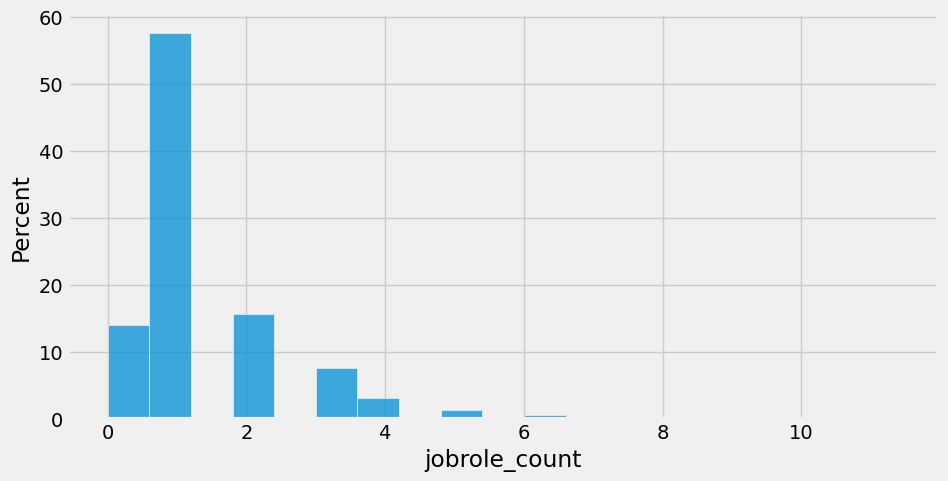

In [59]:
# Vizualize the programming languages 
# Style
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

sns.histplot(data=df_jobrole_, x="jobrole_count", binwidth=0.6, stat="percent", bins=bins)

plt.show()